In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:

df =pd.read_csv('D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M 

100

In [3]:
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
y = df.values[:, 3]
m = len(y) # Number of training examples 
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5]) 
print('m = ', m) 

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


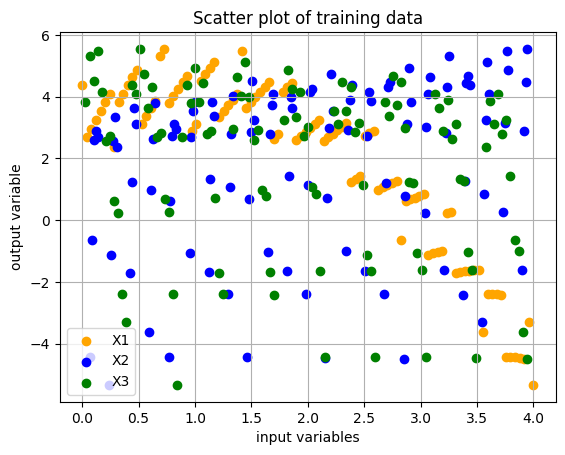

In [4]:
plt.scatter(X1,y,color='orange',label='X1')
plt.scatter(X2,y,color='blue',label='X2')
plt.scatter(X3,y,color='green',label='X3')
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('input variables') 
plt.ylabel('output variable') 
plt.title('Scatter plot of training data')
plt.legend()

In [5]:

#Lets create a matrix with single column of ones 
X_Ones = np.ones((m, 1)) 
X_Ones[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X1_Vertical = X1.reshape(m, 1)
X2_Vertical = X2.reshape(m, 1)
X3_Vertical = X3.reshape(m, 1) 
X1_Vertical[:10]
#X2_Vertical[:10]
#X3_Vertical[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [7]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X1_Features = np.hstack((X_Ones, X1_Vertical))
X2_Features = np.hstack((X_Ones, X2_Vertical))
X3_Features = np.hstack((X_Ones, X3_Vertical))
X1_Features[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [8]:
theta = np.zeros(2) #theta has 2 elements for the 2 features 
theta 

array([0., 0.])

In [9]:
def compute_cost(X_Features, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X_Features.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [10]:
# Lets compute the cost for theta values 
cost = compute_cost(X1_Features, y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [11]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [12]:
theta = [0., 0.] 
iterations = 1500; 
alpha = 0.01; 

In [13]:
theta_X1, cost_history_X1 = gradient_descent(X1_Features, y, theta, alpha, iterations) 
print('Final value of theta_X1 =', theta_X1) 
print('cost_history_X1 =', cost_history_X1) 

Final value of theta_X1 = [ 5.71850653 -1.9568206 ]
cost_history_X1 = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


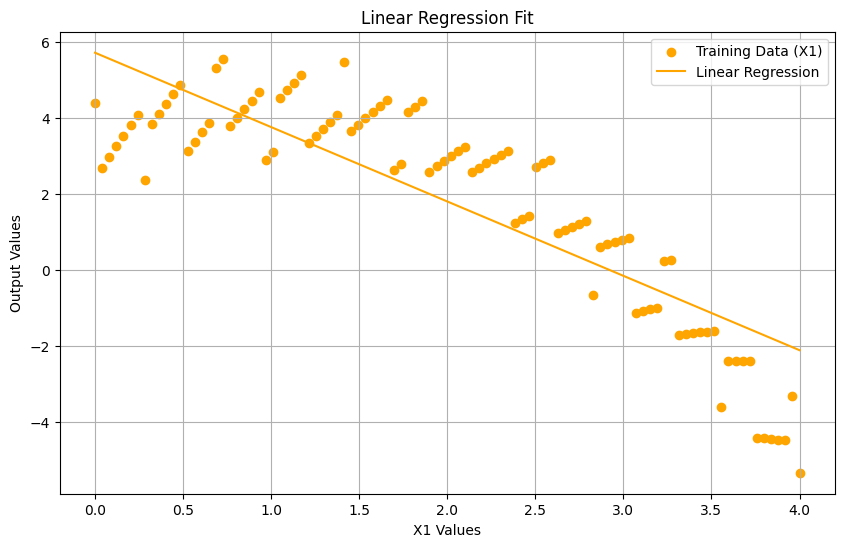

In [14]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X1_Features[:,1], y, color='orange', label= 'Training Data (X1)') 
plt.plot(X1_Features[:,1],X1_Features.dot(theta_X1), color='orange', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X1 Values') 
plt.ylabel('Output Values') 
plt.title('Linear Regression Fit') 
plt.legend()

In [15]:
theta_X2, cost_history_X2 = gradient_descent(X2_Features, y, theta, alpha, iterations) 
print('Final value of theta_X2 =', theta_X2) 
print('cost_history_X2 =', cost_history_X2) 

Final value of theta_X2 = [0.71988473 0.56390334]
cost_history_X2 = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


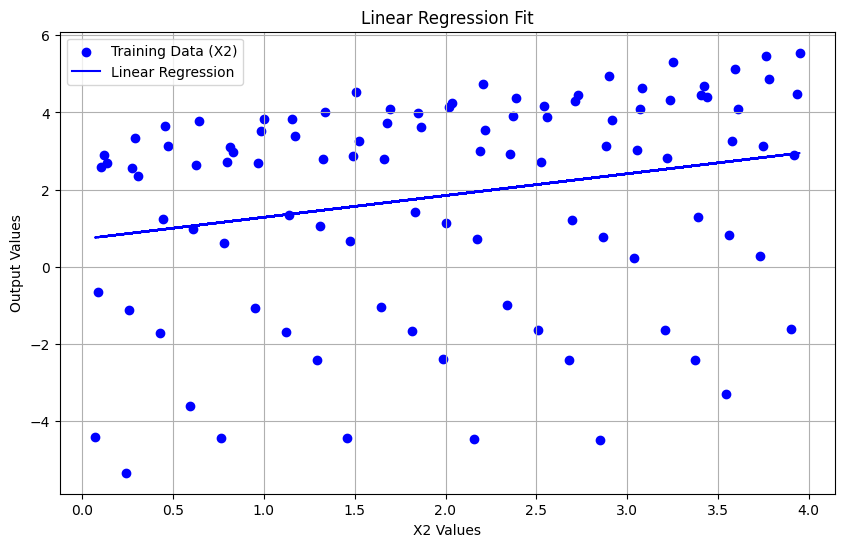

In [16]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X2_Features[:,1], y, color='blue', label= 'Training Data (X2)') 
plt.plot(X2_Features[:,1],X2_Features.dot(theta_X2), color='blue', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X2 Values') 
plt.ylabel('Output Values') 
plt.title('Linear Regression Fit') 
plt.legend()

In [17]:
theta_X3, cost_history_X3 = gradient_descent(X3_Features, y, theta, alpha, iterations) 
print('Final value of theta_X3 =', theta_X3) 
print('cost_history_X3 =', cost_history_X3) 

Final value of theta_X3 = [ 2.78048129 -0.48451631]
cost_history_X3 = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


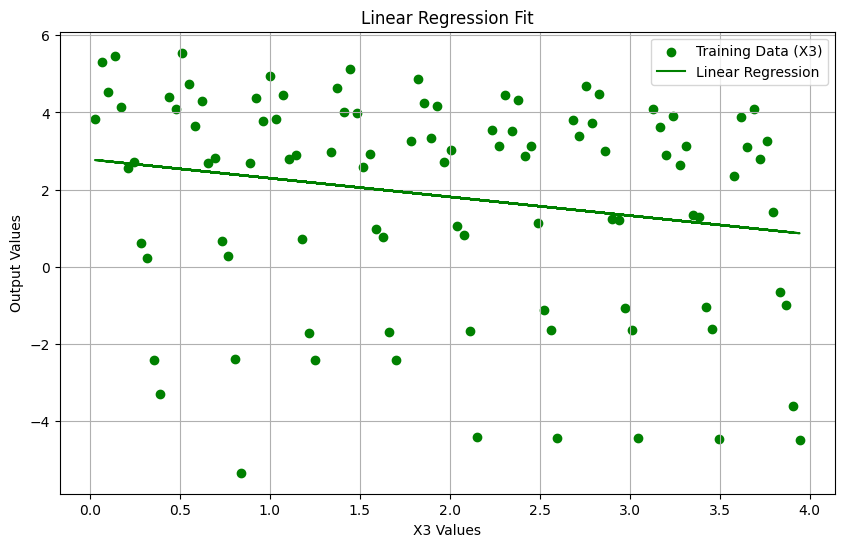

In [18]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X3_Features[:,1], y, color='green', label= 'Training Data (X3)') 
plt.plot(X3_Features[:,1],X3_Features.dot(theta_X3), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X3 Values') 
plt.ylabel('Output Values') 
plt.title('Linear Regression Fit') 
plt.legend()

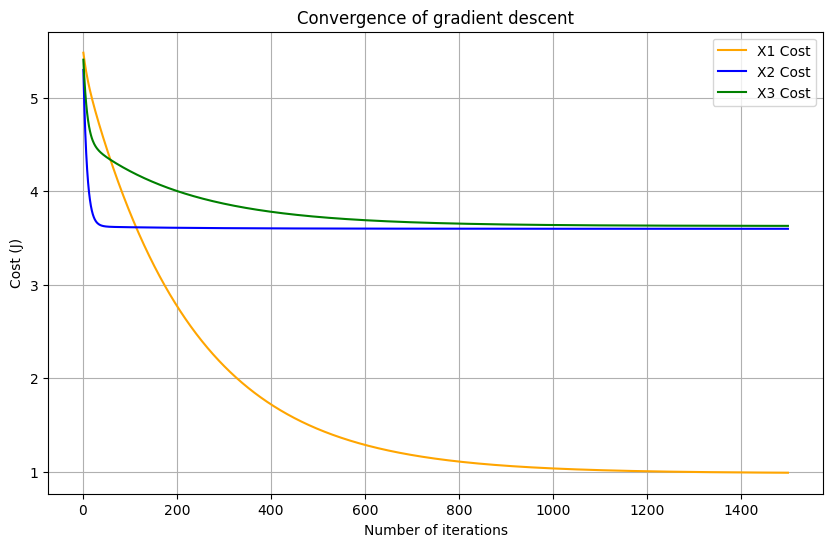

In [19]:
plt.plot(range(1, iterations + 1),cost_history_X1, color='orange', label='X1 Cost')
plt.plot(range(1, iterations + 1),cost_history_X2, color='blue', label='X2 Cost') 
plt.plot(range(1, iterations + 1),cost_history_X3, color='green', label='X3 Cost') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent')
plt.legend()